# Q1

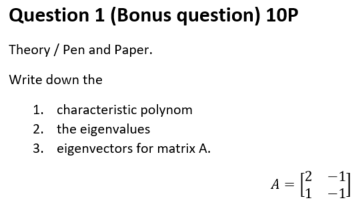

![alt text](https://drive.google.com/uc?id=1j1q_zrElYFsaHphBI09VX0kSoM7qH7HW)

![alt text](https://drive.google.com/uc?id=1ZgtCMsEN5G0TUwEycIWDNVjmWO7BBScf)

![alt text](https://drive.google.com/uc?id=1fwkdepq69040ilIwiGhNMeveS-WWDZjj)

![alt text](https://drive.google.com/uc?id=13Pedcz2FtbjOwxxy_Qxy3xVg955OF2pZ)

![alt text](https://drive.google.com/uc?id=1rr5CM0itYCz13YuWvdyIQkMQ-iZSn6D-)

# Q2

Why do you need to standardize (zero mean, unit variance) your data before you apply a PCA?

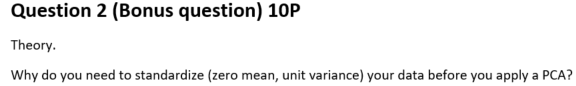


* Standardization is important for giving emphasis to the variables having higher variances than the variables with lower variances in the course of identification of the appropriate principal components.

*   If your features or your variables are not on the same scale, then standardization is done in order to ensure that they are put in a proper scale in order to do the anaylsis. This is done following the standard normal distribution with mean zero and standard deviation of one. 

*   Also used for better visualization of complex matrix.

*   We do scaling of each variables with each variance that ensure that PC direction that we find will not be influenced by magnitude or scale of the variable. If the features are on the same scale, standardization is not necessary. If variables are in scales of very different magnitudes, then standadization is necessary.

*  To make highly skewed data less skewed ( if you have –ve values) which allow easily manipulation of our data.

*  You do transpose of the data and correct any BIAS may occur so you divided by mean.

 


# Q3 - Q5

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [ ]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# some preprocessing
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
Y = pd.DataFrame(cancer.target, columns = ["class"])
Y = Y.replace({0: "malignant", 1 : "benign"})

# Q3: PCA

In [ ]:
# hint: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
import numpy as np

## 3-2 standardize data

In [ ]:
# hint: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# Initializing the standard scalar object
sc = StandardScaler()

# Standardizing using standard scalar
X_standard =  sc.fit_transform(X)

# Converting the numpy array to dataframe
X_standard = pd.DataFrame(X_standard)

## 3-3 loadings


In [ ]:
# hint  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html for mean and std
# hint https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html transpose the .describe() output from wide to long


# Implementing describe function before standardization
out_before = X.describe()
out_before_t = out_before.T

# Implementing describe function after standardization
out_after = X_standard.describe()
out_after_t = out_after.T

print("The summary statistics of the values before standardization")
print(out_before_t)
print("The summary statistics of the values after standardization")
print(out_after_t)


The summary statistics of the values before standardization
                         count        mean  ...          75%         max
mean radius              569.0   14.127292  ...    15.780000    28.11000
mean texture             569.0   19.289649  ...    21.800000    39.28000
mean perimeter           569.0   91.969033  ...   104.100000   188.50000
mean area                569.0  654.889104  ...   782.700000  2501.00000
mean smoothness          569.0    0.096360  ...     0.105300     0.16340
mean compactness         569.0    0.104341  ...     0.130400     0.34540
mean concavity           569.0    0.088799  ...     0.130700     0.42680
mean concave points      569.0    0.048919  ...     0.074000     0.20120
mean symmetry            569.0    0.181162  ...     0.195700     0.30400
mean fractal dimension   569.0    0.062798  ...     0.066120     0.09744
radius error             569.0    0.405172  ...     0.478900     2.87300
texture error            569.0    1.216853  ...     1.474000    

## 3-4 PCA

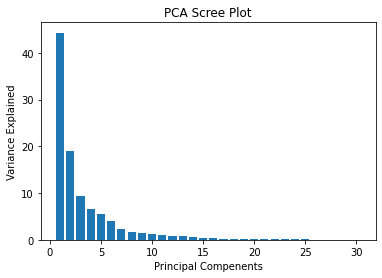

In [ ]:
# Initilizing the PCA object
pca = PCA()

# Fitting the model and  applying the dimentinality reduction on the scaled data
pca_data = pca.fit_transform(X_standard)

# Storing the variance for all the principal components
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

# Plotting the scree plot
plt.bar(x=range(1,len(per_var)+1), height = per_var)
plt.ylabel('Variance Explained')
plt.xlabel('Principal Compenents')
plt.title('PCA Scree Plot')
plt.show()



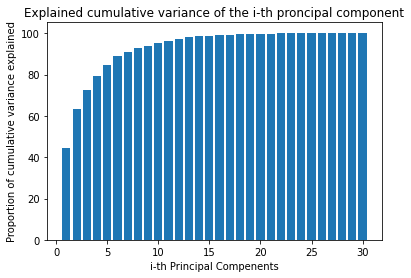

In [ ]:
# Initilizing the PCA object
pca = PCA()

# Fitting the model and  applying the dimentinality reduction on the scaled data
pca_data = pca.fit_transform(X_standard)

# Storing the variance for all the principal components
per_var = np.cumsum(np.round(pca.explained_variance_ratio_*100, decimals=1))

# Plotting the scree plot
plt.bar(x=range(1,len(per_var)+1), height = per_var)
plt.ylabel('Proportion of cumulative variance explained')
plt.xlabel('i-th Principal Compenents')
plt.title('Explained cumulative variance of the i-th proncipal component')
plt.show()



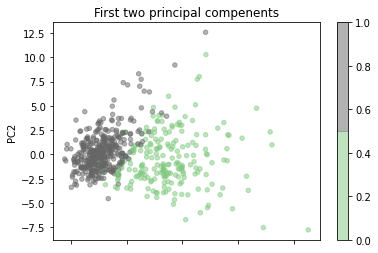

In [ ]:
# Converting the PCA array to dataframe
pca_df =  pd.DataFrame(data = pca_data)

# Selecting the first two princpal components
pca_df = pca_df.iloc[:,0:2] 

# Naming the columns
pca_df.columns = ['pc1','pc2']

# Plotting the scatterplot colour-coded by the target values
pca_df.plot.scatter(x = "pc1",
                         y = "pc2", 
                         c = cancer.target, 
                         cmap=plt.cm.get_cmap('Accent', 2), 
                         alpha = 0.5)

plt.title("First two principal compenents")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
# Calculating the number of PCs to account for 80 % of the variance
count = 1
for i in per_var:
  if i<=80:
    count  = count + 1
print(count)

5


**Answers:**

**3-4c**
*   Ideally, we should choose the number principal compenents in such a way so that it can account for the 100% of the data variance. But in practical scenario, this is not possible. 

*  In scenarios, when we need to account for 95% of the variance, the quality of the solution is quite good. 

*   However, for our breast cancer dataset, the choice would depend on the performance metrices for the classifiers. It has been observed that with **5 Principal components**, the model performs quite well.

3-4g-ii

In [ ]:
n = 5
print(per_var[n-1])


84.8


**Answers:**

**3-4d**

With n=5 , i.e. with 5 principal components, we can account for **84.8 percentage** of the data. 



In [ ]:
# Calculating the number of PCs to account for 95 % of the variance
count = 1
for i in per_var:
  if i<=95:
    count  = count + 1
print(count)

10


**Answers:**

**3-4e**

From the above code, it is clear that we need **10 principal components** to account for 95% of the variance.


**Answers:**

**3-4g-i:**

Following are my observations from the scatterplot:


*   It is observed that PCA may be a good choice to cluster the data as it does represent the groupings in a coherent and  clear way. 
*   Although there are few ovelaps between the two groups of the target varables, one can clearly distinguish the benign and malignant cancers from the scatterplot. 



**Answers:**

**3-4g-ii:**

I would argue that the number of principal components =2 is pretty good choice to demarcate the benign and malignant types of cancers. The reason is because of the fact that they are separable visually quite well igniring the few overlaps. 


# Q4 Clustering

In [ ]:
# Importing the necessary packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


### single linkage dendrogram

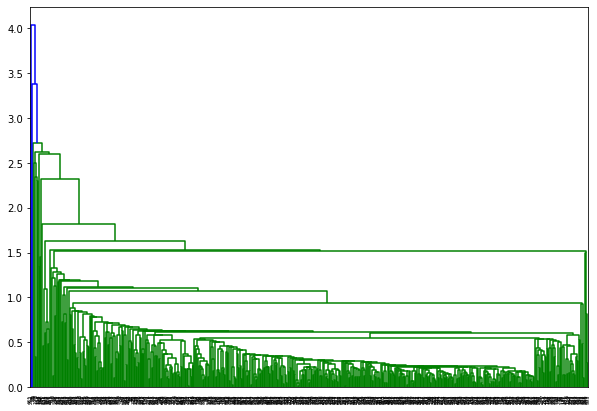

In [ ]:
linked = linkage(pca_df, method='single')
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',            
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

### ward linkage dendrogram

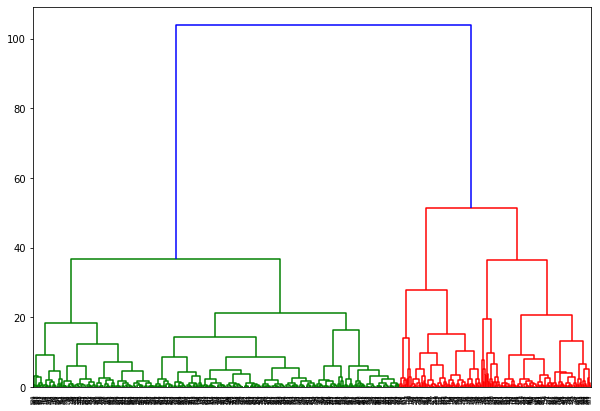

In [ ]:
# Implementing the ward linkage dendogram
linked = linkage(pca_df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',            
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

### Agglomerative Clustering + Scatter Plot

agglomerative clustering for single linkage

In [ ]:
# hint https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
cluster_singlelinkage = AgglomerativeClustering(affinity="euclidean", linkage="single")
cluster_singlelinkage.fit_predict(pca_df)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

agglomerative clustering using your recommended linkage method

In [ ]:
cluster_wardlinkage = AgglomerativeClustering(affinity="euclidean", linkage="ward")
cluster_wardlinkage.fit_predict(pca_df)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

compare cluster performance

In [ ]:
# hint https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
from sklearn.metrics import classification_report

print(classification_report(cancer.target, cluster_singlelinkage.labels_))
print(classification_report(cancer.target, cluster_wardlinkage.labels_))


              precision    recall  f1-score   support

           0       0.37      1.00      0.54       212
           1       0.00      0.00      0.00       357

    accuracy                           0.37       569
   macro avg       0.19      0.50      0.27       569
weighted avg       0.14      0.37      0.20       569

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       212
           1       0.91      0.95      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



**Answers:**

**4-1:**

Based on the visual interpretation of the dendograms above, I would recommend the **ward** linkage for clustering. Following are the reason for my recommendations:

1. The single-link produces long chains and hence it rather impossible to understand visually the clusters whenever the number of elements are large. On the other hand, from the ward dendogram, the visual representation is quite neat and better than that of the single-link.

2. The dendogram is rather skewed in case of the single-linkage whereas the ward linkage is evenly distributed and produces rather clusters spherical in nature. 



**Answers:**

**4-2:**

Based on the performance metrices above, I would say that the agglomerative clustering based on Euclidean distance having a ward linkage for clustering is the best.  Following are the reason for my choice:

1. In case of single linkage, the precision is 0.37 for the malignant group and 0.00 for the benign group. The recall 1 for malignant and 0.0 for benign. Hence, it is pretty bad and cannot be used for any predictive modeling. 

2. On the other hand, the performance metrices are pretty high for the ward linkage. The precisions are 0.91 for both the target groups and recalls are 0.83 and 0.95 for the malignant and benign classes respectively. 

Thus, it is observed that there is a clear correspondence between the performace metrices and the dendograms for the respective linkages. Ward linkage outperforms the single linkage as also evident from the dendograms. 

# PCA vs SVD

Read https://intoli.com/blog/pca-and-svd/ and https://stats.stackexchange.com/a/134283 and explain **briefly** in your words how PCA and SVD are related.
1.	Which important assumptions does each method make?
2.	What are the conceptual similarities?
3.	What are the conceptual differences?
4.	What are the contrasting Pro’s and Con’s?
5.	When would you prefer one over the other? 


**Answers:**

**5-1**

Assumptions of PCA:


*   Ideally, there should be atleast 150 instances of the samples and and there should be ratio of at least five cases for each variable. 

*   Ensure there is enough correlation between variables to allow data reduction.

*   PCA based on Euclidian distance measure.

*   Assume ensure linear-relationship between variables to do linear transformation. 

*   No outliers , it will affect the results. 

Assumptiosn of SVD:

* The original matrix is a low-rank matrix

* For solving the linear system of equations, it assumes a non-square matrices. 

*  Ensure there is enough correlation between variables to allow data reduction.

*   Assume ensure linear-relationship between variables to do linear transformation. 



**Answers:**

**5-2**

*   Singular value decomposition (SVD) and principal component analysis (PCA) are two eigenvalue methods used to reduce a high-dimensional data set into fewer dimensions while retaining important information.

*   SVD is used to find PCA by truncating the less important basis vectors in the original SVD matrix.

*  SVD is another way to calculate eigen vector and the coefficient with them to reconstruct data The diagonal elements hold the variances of individual variables. 

* SVD of the data matrix can be used to perform PCA, and it is more numerically stable than EVD and does not involve the explicit matrix multiplication for constructing the sample covariance matrix.



**Answers:**

**5-3**

*   SVD gives us all the possible ways to diagonalize a matrix into special matrices which are used for the analysis purpose as they are easy to manipulate. Hence, in essence it helps to unwrap the data into independent components. PCA on the other hand would only give the most important component that repreesents maximum variance and skips less significant components. 

*   SVD usually means an SVD of the design matrix, while PCA is an SVD of the covariance matrix.

*  The difference between the two is how the deal with the mean of the data. PCA subtracts it off, SVD doesn’t.
    
*   SVD gives us both weights and loadings while PCA only gives us weights (though loadings are easy to get from weights).

*  PCA is a data analytic method. SVD is a mathematical operation.


**Answers:**

**5-4**

**Pros of SVD:**

*   SVD use the singular value decomposition so we can say that some improvement done by SVD where It has more computational efficiency especially for high dimensional data where perform the calculations with the covariance matrix can be inefficient. 

*  Numerical precision of SVD is higher.

*  The divide and conquer approach used in SVD is very stable. 

**Cons of SVD:** 

*   If the data is non-colinear, it may not work so well. 

*   The results obtained from SVD is not suitable always for good visualization.

*   At times there is no relationship between variance and predictive power and hence can skip useful information.

**Pros of PCA:**

* Advantegeous for representation learning. It uncovers the relevant features for higher dimentional data. 

* PCA removes correlated variables and ake every variable independent of one another. 

* PCA aids in better visualization by converting higher-dimensional data to lower dimensions.

**Cons of PCA:**

*  PCA uses Eigenvalue decomposition which  becomes computationally expensive when calculating the covariance matrix. 

*  Eingenvalue decomposition in PCA results in numerical errors and loss of precision.

*  The QR algorithm that eigenvalue decomposition uses is less stable. 




**Answers:**

**5-5**

This answer is a little bit indirect since SVD and PCA are not exactly same things that we can compare. Both are used to reduce the rank of a matrix and SVD is one such technique to perform PCA. 

However, in the given context, I would **prefer to use SVD**.  The reasons for my choice is as follows.

1. Calculation of SVD is numerically much efficient and does not require to compute the covariance matrix. 

2. SVD gives all the components to construct the matrix completely. On the other hand PCA (principle component analysis) gives the relevant components. PCA gives good result but on some other few more components may be necessary to get a meaningful results. 

3. Algorithm for calculating SVD is much more stable as compared to PCA calculations using EVD. 

